# Logistic Regression

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, roc_curve, auc

In [2]:
df = pd.read_csv('ML-EdgeIIoT-dataset.csv')
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_17244\2195162693.py:1: DtypeWarning: Columns (3,6,11,13,14,15,16,17,31,32,34,39,45,51,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ML-EdgeIIoT-dataset.csv')


,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
1,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
2,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
3,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
4,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157795,2021 23:24:32.698981000,193.152.82.43,192.168.0.128,0,0.0,0.0,0,48729.0,40690.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
157796,2021 23:24:32.699354000,253.52.1.213,192.168.0.128,0,0.0,0.0,0,45657.0,40702.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
157797,2021 23:24:32.719931000,107.155.221.49,192.168.0.128,0,0.0,0.0,0,57686.0,41423.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
157798,2021 23:24:32.752054000,77.242.58.228,192.168.0.128,0,0.0,0.0,0,9555.0,42379.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157800 entries, 0 to 157799
Data columns (total 63 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   frame.time                 157800 non-null  object 
 1   ip.src_host                157800 non-null  object 
 2   ip.dst_host                157800 non-null  object 
 3   arp.dst.proto_ipv4         157800 non-null  object 
 4   arp.opcode                 157800 non-null  float64
 5   arp.hw.size                157800 non-null  float64
 6   arp.src.proto_ipv4         157800 non-null  object 
 7   icmp.checksum              157800 non-null  float64
 8   icmp.seq_le                157800 non-null  float64
 9   icmp.transmit_timestamp    157800 non-null  float64
 10  icmp.unused                157800 non-null  float64
 11  http.file_data             157800 non-null  object 
 12  http.content_length        157800 non-null  float64
 13  http.request.uri.query     15

In [4]:
df.describe()

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,icmp.unused,http.content_length,http.response,http.tls_port,tcp.ack,...,mqtt.len,mqtt.msg_decoded_as,mqtt.msgtype,mqtt.proto_len,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label
count,157800.000000,157800.000000,157800.000000,157800.000000,1.578000e+05,157800.0,157800.000000,157800.000000,157800.0,1.578000e+05,...,157800.000000,157800.0,157800.000000,157800.000000,157800.000000,157800.000000,157800.0,157800.0,157800.0,157800.000000
mean,0.014195,0.059848,3047.291838,3239.979778,4.046816e+04,0.0,14.715520,0.045748,0.0,7.160039e+07,...,0.419341,0.0,0.161331,0.031686,0.189506,0.031686,0.0,0.0,0.0,0.846001
std,0.149783,0.596245,11144.328203,11406.072994,1.764075e+06,0.0,229.659671,0.208938,0.0,3.101231e+08,...,3.606594,0.0,1.293453,0.354598,2.124206,0.354598,0.0,0.0,0.0,0.360949
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.0,0.000000e+00,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.0,0.000000e+00,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.0,1.000000e+00,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.0,4.790000e+02,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000
max,2.000000,6.000000,65532.000000,65524.000000,7.728902e+07,0.0,83655.000000,1.000000,0.0,2.147333e+09,...,39.000000,0.0,14.000000,4.000000,24.000000,4.000000,0.0,0.0,0.0,1.000000


In [5]:
df['frame.time'] = pd.to_datetime(df['frame.time'], errors='coerce')


In [6]:
df['hour'] = df['frame.time'].dt.hour
df['day'] = df['frame.time'].dt.day
df['month'] = df['frame.time'].dt.month
df['year'] = df['frame.time'].dt.year


In [7]:
df.fillna(0, inplace=True)

In [8]:
encoder = LabelEncoder()
df['Attack_label_encoded'] = encoder.fit_transform(df['Attack_label'])


In [9]:
X = df[['hour', 'day', 'month', 'year']]
y = df['Attack_label_encoded']


In [10]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [12]:
model = LogisticRegression()


In [13]:
model.fit(X_train, y_train)


LogisticRegression()

In [14]:
y_pred = model.predict(X_test)


In [15]:
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.8420468948035488


In [16]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[    0  4985]
 [    0 26575]]


In [17]:
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)


F1-score: 0.9142513116023049


In [18]:
recall = recall_score(y_test, y_pred)
print("Recall:", recall)


Recall: 1.0


In [19]:
precision = precision_score(y_test, y_pred)
print("Precision:", precision)


Precision: 0.8420468948035488


In [20]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

In [21]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

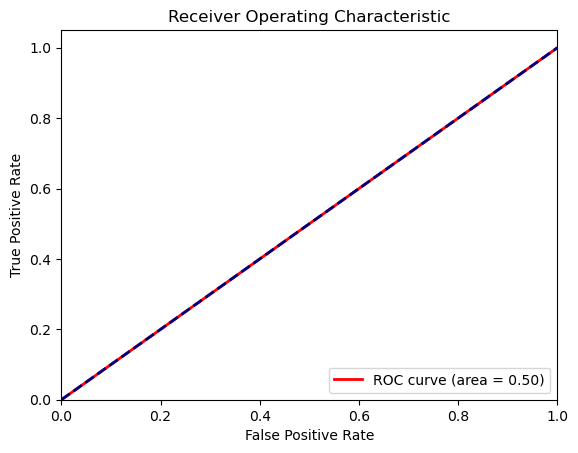

In [22]:
plt.plot(fpr, tpr,color='red',lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# NAIVE BAYES

In [23]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, roc_curve, auc


In [24]:
df1 = pd.read_csv('ML-EdgeIIoT-dataset.csv')
df1

C:\Users\Admin\AppData\Local\Temp\ipykernel_17244\3144464662.py:1: DtypeWarning: Columns (3,6,11,13,14,15,16,17,31,32,34,39,45,51,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('ML-EdgeIIoT-dataset.csv')


,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
1,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
2,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
3,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
4,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157795,2021 23:24:32.698981000,193.152.82.43,192.168.0.128,0,0.0,0.0,0,48729.0,40690.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
157796,2021 23:24:32.699354000,253.52.1.213,192.168.0.128,0,0.0,0.0,0,45657.0,40702.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
157797,2021 23:24:32.719931000,107.155.221.49,192.168.0.128,0,0.0,0.0,0,57686.0,41423.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
157798,2021 23:24:32.752054000,77.242.58.228,192.168.0.128,0,0.0,0.0,0,9555.0,42379.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP


In [25]:
df1['frame.time'] = pd.to_datetime(df1['frame.time'], errors='coerce')


In [26]:
df1['hour'] = df1['frame.time'].dt.hour
df1['day'] = df1['frame.time'].dt.day
df1['month'] = df1['frame.time'].dt.month
df1['year'] = df1['frame.time'].dt.year


In [27]:
df1.fillna(0, inplace=True)


In [28]:
encoder = LabelEncoder()
df1['Attack_label_encoded'] = encoder.fit_transform(df1['Attack_label'])


In [29]:
X = df1[['hour', 'day', 'month', 'year']]
y = df1['Attack_label_encoded']


In [30]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [32]:
model = GaussianNB()


In [33]:
model.fit(X_train, y_train)


GaussianNB()

In [34]:
y_pred = model.predict(X_test)


In [35]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")

Confusion Matrix:


In [36]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.25804816223067173


In [37]:
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)


F1-score: 0.21248402502186048


In [38]:
recall = recall_score(y_test, y_pred)
print("Recall:", recall)


Recall: 0.11887111947318908


In [39]:
precision = precision_score(y_test, y_pred)
print("Precision:", precision)


Precision: 1.0


In [40]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


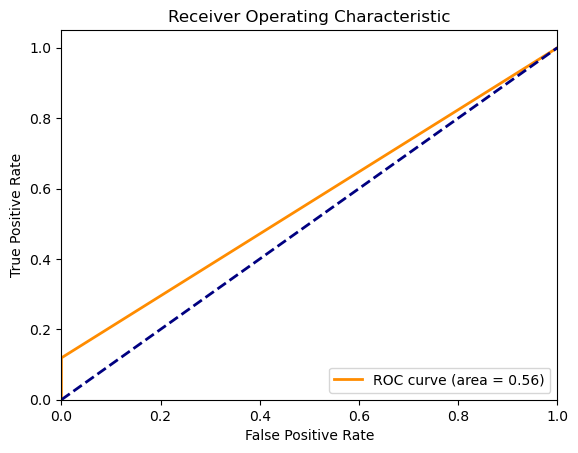

In [41]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# LinearDiscriminantAnalysis

In [42]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, roc_curve, auc
import matplotlib.pyplot as plt

In [43]:
df2 = pd.read_csv('ML-EdgeIIoT-dataset.csv')
df2

C:\Users\Admin\AppData\Local\Temp\ipykernel_17244\2410390088.py:1: DtypeWarning: Columns (3,6,11,13,14,15,16,17,31,32,34,39,45,51,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('ML-EdgeIIoT-dataset.csv')


,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
1,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
2,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
3,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
4,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157795,2021 23:24:32.698981000,193.152.82.43,192.168.0.128,0,0.0,0.0,0,48729.0,40690.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
157796,2021 23:24:32.699354000,253.52.1.213,192.168.0.128,0,0.0,0.0,0,45657.0,40702.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
157797,2021 23:24:32.719931000,107.155.221.49,192.168.0.128,0,0.0,0.0,0,57686.0,41423.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
157798,2021 23:24:32.752054000,77.242.58.228,192.168.0.128,0,0.0,0.0,0,9555.0,42379.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP


In [44]:
df2['frame.time'] = pd.to_datetime(df2['frame.time'], errors='coerce')


In [45]:
df2['hour'] = df2['frame.time'].dt.hour
df2['day'] = df2['frame.time'].dt.day
df2['month'] = df2['frame.time'].dt.month
df2['year'] = df2['frame.time'].dt.year

In [46]:
df2.fillna(0, inplace=True)

In [47]:
encoder = LabelEncoder()
df2['Attack_label_encoded'] = encoder.fit_transform(df2['Attack_label'])


In [48]:
X = df2[['hour', 'day', 'month', 'year']]
y = df2['Attack_label_encoded']


In [49]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [51]:
model = LinearDiscriminantAnalysis()


In [52]:
model.fit(X_train, y_train)


LinearDiscriminantAnalysis()

In [53]:
y_pred = model.predict(X_test)

In [54]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[    0  4985]
 [    0 26575]]


In [55]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8420468948035488


In [56]:
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

F1-score: 0.9142513116023049


In [57]:
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 1.0


In [58]:
precision = precision_score(y_test, y_pred)
print("Precision:", precision)


Precision: 0.8420468948035488


In [59]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


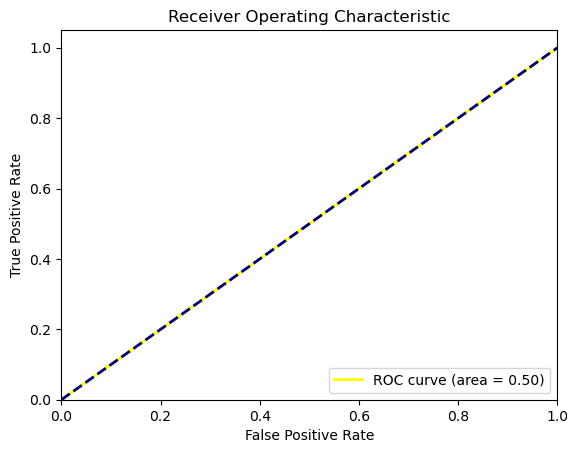

In [60]:
plt.figure()
plt.plot(fpr, tpr, color='yellow', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# KNN

In [61]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, roc_curve, auc
import matplotlib.pyplot as plt


In [62]:
df3= pd.read_csv('ML-EdgeIIoT-dataset.csv')

C:\Users\Admin\AppData\Local\Temp\ipykernel_17244\968135635.py:1: DtypeWarning: Columns (3,6,11,13,14,15,16,17,31,32,34,39,45,51,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df3= pd.read_csv('ML-EdgeIIoT-dataset.csv')


In [63]:
df3['frame.time'] = pd.to_datetime(df3['frame.time'], errors='coerce')


In [64]:
df3['hour'] = df3['frame.time'].dt.hour
df3['day'] = df3['frame.time'].dt.day
df3['month'] = df3['frame.time'].dt.month
df3['year'] = df3['frame.time'].dt.year

In [65]:
df3.fillna(0, inplace=True)

In [66]:
encoder = LabelEncoder()
df3['Attack_label_encoded'] = encoder.fit_transform(df3['Attack_label'])


In [67]:
X = df3[['hour', 'day', 'month', 'year']]
y = df3['Attack_label_encoded']

In [68]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = KNeighborsClassifier(n_neighbors=5)


In [70]:
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [71]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[ 1790  3195]
 [ 1729 24846]]


In [72]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8439797211660329


In [73]:
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

F1-score: 0.9098432693716128


In [74]:
recall = recall_score(y_test, y_pred)
print("Recall:", recall)


Recall: 0.9349388523047978


In [75]:
precision = precision_score(y_test, y_pred)
print("Precision:", precision)


Precision: 0.8860596982989194


In [76]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

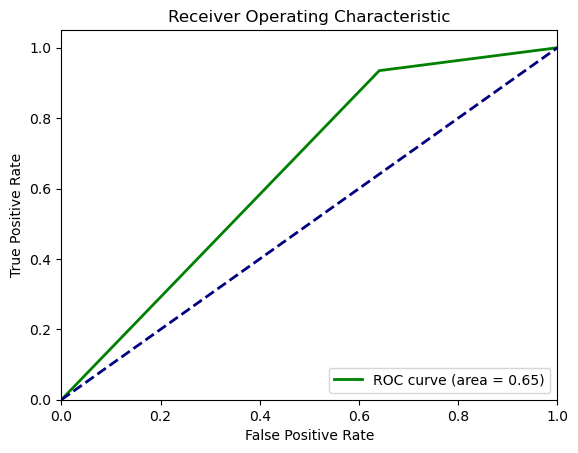

In [77]:
plt.figure()
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# Decision Tree classifier


In [78]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, roc_curve, auc
import matplotlib.pyplot as plt


In [79]:
df4= pd.read_csv('ML-EdgeIIoT-dataset.csv')

C:\Users\Admin\AppData\Local\Temp\ipykernel_17244\1401060134.py:1: DtypeWarning: Columns (3,6,11,13,14,15,16,17,31,32,34,39,45,51,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df4= pd.read_csv('ML-EdgeIIoT-dataset.csv')


In [80]:
df4['frame.time'] = pd.to_datetime(df4['frame.time'], errors='coerce')

In [81]:
df4['hour'] = df4['frame.time'].dt.hour
df4['day'] = df4['frame.time'].dt.day
df4['month'] = df4['frame.time'].dt.month
df4['year'] = df4['frame.time'].dt.year


In [82]:
df4.fillna(0, inplace=True)


In [83]:
encoder = LabelEncoder()
df4['Attack_label_encoded'] = encoder.fit_transform(df4['Attack_label'])


In [84]:
X = df4[['hour', 'day', 'month', 'year']]
y = df4['Attack_label_encoded']


In [85]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [87]:
model = DecisionTreeClassifier()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


In [88]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[ 1220  3765]
 [  370 26205]]


In [89]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.868979721166033


In [90]:
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)


F1-score: 0.9268724025112742


In [91]:
recall = recall_score(y_test, y_pred)
print("Recall:", recall)


Recall: 0.9860771401693321


In [92]:
precision = precision_score(y_test, y_pred)
print("Precision:", precision)


Precision: 0.8743743743743744


In [93]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


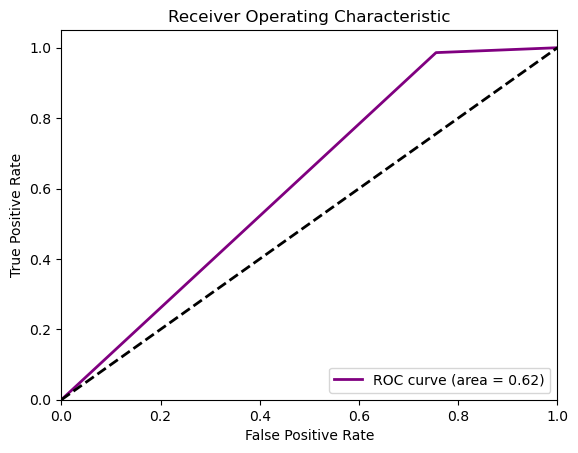

In [94]:
plt.figure()
plt.plot(fpr, tpr, color='purple', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Random Forest classifier



In [95]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, roc_curve, auc
import matplotlib.pyplot as plt

In [96]:
df5 = pd.read_csv('ML-EdgeIIoT-dataset.csv')
df5

C:\Users\Admin\AppData\Local\Temp\ipykernel_17244\3354090486.py:1: DtypeWarning: Columns (3,6,11,13,14,15,16,17,31,32,34,39,45,51,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df5 = pd.read_csv('ML-EdgeIIoT-dataset.csv')


,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
1,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
2,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
3,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
4,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157795,2021 23:24:32.698981000,193.152.82.43,192.168.0.128,0,0.0,0.0,0,48729.0,40690.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
157796,2021 23:24:32.699354000,253.52.1.213,192.168.0.128,0,0.0,0.0,0,45657.0,40702.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
157797,2021 23:24:32.719931000,107.155.221.49,192.168.0.128,0,0.0,0.0,0,57686.0,41423.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
157798,2021 23:24:32.752054000,77.242.58.228,192.168.0.128,0,0.0,0.0,0,9555.0,42379.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP


In [97]:
df5['frame.time'] = pd.to_datetime(df5['frame.time'], errors='coerce')


In [98]:
df5['hour'] = df5['frame.time'].dt.hour
df5['day'] = df5['frame.time'].dt.day
df5['month'] = df5['frame.time'].dt.month
df5['year'] = df5['frame.time'].dt.year

In [99]:
df5.fillna(0, inplace=True)


In [100]:
encoder = LabelEncoder()
df5['Attack_label_encoded'] = encoder.fit_transform(df5['Attack_label'])


In [101]:
X = df5[['hour', 'day', 'month', 'year']]
y = df5['Attack_label_encoded']


In [102]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [104]:
model = RandomForestClassifier(n_estimators=100)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


In [105]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 1220  3765]
 [  370 26205]]


In [106]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.868979721166033


In [107]:
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)


F1-score: 0.9268724025112742


In [108]:
recall = recall_score(y_test, y_pred)
print("Recall:", recall)


Recall: 0.9860771401693321


In [109]:
precision = precision_score(y_test, y_pred)
print("Precision:", precision)


Precision: 0.8743743743743744


In [110]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


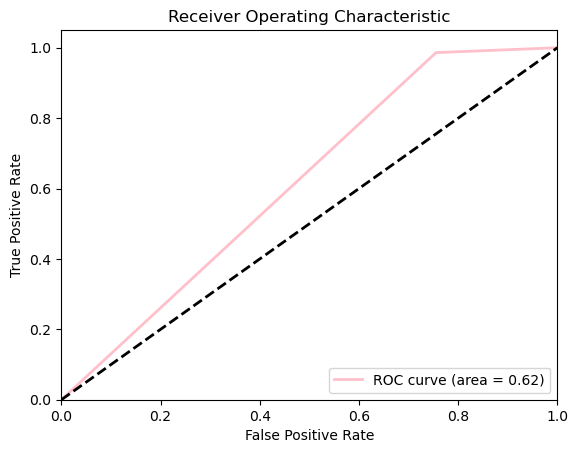

In [111]:
plt.figure()
plt.plot(fpr, tpr, color='pink', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# SVM classifier


In [112]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, roc_curve, auc
import matplotlib.pyplot as plt

In [113]:
df6 = pd.read_csv('ML-EdgeIIoT-dataset.csv')

C:\Users\Admin\AppData\Local\Temp\ipykernel_17244\3218900238.py:1: DtypeWarning: Columns (3,6,11,13,14,15,16,17,31,32,34,39,45,51,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df6 = pd.read_csv('ML-EdgeIIoT-dataset.csv')


In [114]:
df6['frame.time'] = pd.to_datetime(df6['frame.time'], errors='coerce')

In [115]:
df6['hour'] = df6['frame.time'].dt.hour
df6['day'] = df6['frame.time'].dt.day
df6['month'] = df6['frame.time'].dt.month
df6['year'] = df6['frame.time'].dt.year


In [116]:
df6.fillna(0, inplace=True)

In [117]:
encoder = LabelEncoder()
df6['Attack_label_encoded'] = encoder.fit_transform(df6['Attack_label'])


In [118]:
X = df6[['hour', 'day', 'month', 'year']]
y = df6['Attack_label_encoded']


In [119]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [120]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [123]:
model = SVC()

In [124]:
model.fit(X_train, y_train)

SVC()

In [125]:
y_pred = model.predict(X_test)

In [126]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[    0  4985]
 [    0 26575]]


In [127]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8420468948035488


In [128]:
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

F1-score: 0.9142513116023049


In [129]:
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 1.0


In [130]:
precision = precision_score(y_test, y_pred)
print("Precision:", precision)


Precision: 0.8420468948035488


In [131]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

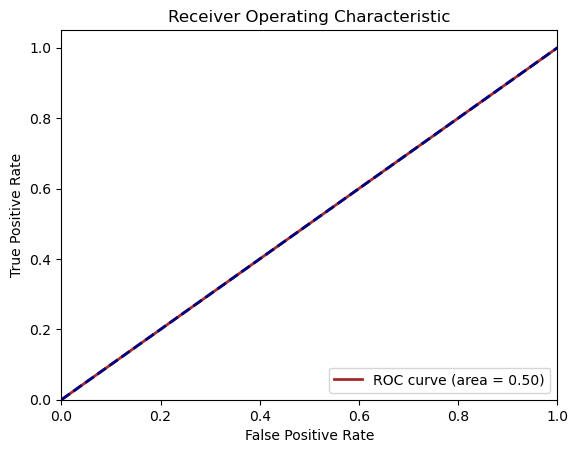

In [132]:
plt.figure()
plt.plot(fpr, tpr, color='brown', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [133]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, roc_curve, auc
import matplotlib.pyplot as plt

In [135]:
df7 = pd.read_csv('ML-EdgeIIoT-dataset.csv')
df7

C:\Users\Admin\AppData\Local\Temp\ipykernel_17244\2429366161.py:1: DtypeWarning: Columns (3,6,11,13,14,15,16,17,31,32,34,39,45,51,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df7 = pd.read_csv('ML-EdgeIIoT-dataset.csv')


,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
1,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
2,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
3,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
4,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157795,2021 23:24:32.698981000,193.152.82.43,192.168.0.128,0,0.0,0.0,0,48729.0,40690.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
157796,2021 23:24:32.699354000,253.52.1.213,192.168.0.128,0,0.0,0.0,0,45657.0,40702.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
157797,2021 23:24:32.719931000,107.155.221.49,192.168.0.128,0,0.0,0.0,0,57686.0,41423.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
157798,2021 23:24:32.752054000,77.242.58.228,192.168.0.128,0,0.0,0.0,0,9555.0,42379.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP


In [136]:
df7['frame.time'] = pd.to_datetime(df7['frame.time'], errors='coerce')

In [137]:
df7['hour'] = df7['frame.time'].dt.hour
df7['day'] = df7['frame.time'].dt.day
df7['month'] = df7['frame.time'].dt.month
df7['year'] = df7['frame.time'].dt.year


In [139]:
df7.fillna(0, inplace=True)


In [141]:
encoder = LabelEncoder()
df7['Attack_label_encoded'] = encoder.fit_transform(df7['Attack_label'])


In [143]:
X = df7[['hour', 'day', 'month', 'year']]
y = df7['Attack_label_encoded']

In [144]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [145]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [146]:
model = AdaBoostClassifier(n_estimators=100)

In [147]:
model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [148]:
y_pred = model.predict(X_test)

In [149]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[  805  4180]
 [    0 26575]]


In [150]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.867553865652725


In [151]:
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)


F1-score: 0.9270887842316414


In [152]:
recall = recall_score(y_test, y_pred)
print("Recall:", recall)


Recall: 1.0


In [153]:
precision = precision_score(y_test, y_pred)
print("Precision:", precision)


Precision: 0.8640871403023899


In [154]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


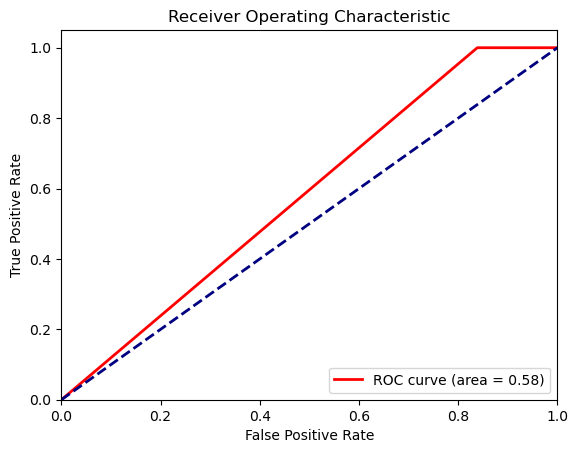

In [156]:
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# XG-Boost

In [157]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, roc_curve, auc
import matplotlib.pyplot as plt


In [158]:
df8 = pd.read_csv('ML-EdgeIIoT-dataset.csv')
df8

C:\Users\Admin\AppData\Local\Temp\ipykernel_17244\202886831.py:1: DtypeWarning: Columns (3,6,11,13,14,15,16,17,31,32,34,39,45,51,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df8 = pd.read_csv('ML-EdgeIIoT-dataset.csv')


,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
1,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
2,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
3,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
4,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157795,2021 23:24:32.698981000,193.152.82.43,192.168.0.128,0,0.0,0.0,0,48729.0,40690.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
157796,2021 23:24:32.699354000,253.52.1.213,192.168.0.128,0,0.0,0.0,0,45657.0,40702.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
157797,2021 23:24:32.719931000,107.155.221.49,192.168.0.128,0,0.0,0.0,0,57686.0,41423.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
157798,2021 23:24:32.752054000,77.242.58.228,192.168.0.128,0,0.0,0.0,0,9555.0,42379.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP


In [159]:
df8['frame.time'] = pd.to_datetime(df8['frame.time'], errors='coerce')



In [160]:
df8['hour'] = df8['frame.time'].dt.hour
df8['day'] = df8['frame.time'].dt.day
df8['month'] = df8['frame.time'].dt.month
df8['year'] = df8['frame.time'].dt.year


In [162]:
df8.fillna(0, inplace=True)


In [164]:
encoder = LabelEncoder()
df8['Attack_label_encoded'] = encoder.fit_transform(df8['Attack_label'])


In [166]:
X = df8[['hour', 'day', 'month', 'year']]
y = df8['Attack_label_encoded']

In [167]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [168]:
model = xgb.XGBClassifier()

In [169]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [170]:
y_pred = model.predict(X_test)

In [172]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

recall = recall_score(y_test, y_pred)
print("Recall:", recall)


precision = precision_score(y_test, y_pred)
print("Precision:", precision)


Confusion Matrix:
[[ 1220  3765]
 [  370 26205]]
Accuracy: 0.868979721166033
F1-score: 0.9268724025112742
Recall: 0.9860771401693321
Precision: 0.8743743743743744


In [173]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

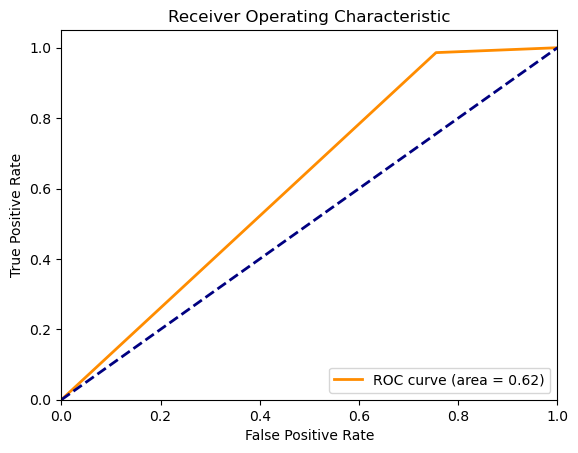

In [174]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# Stochastic Gradient Descent (SGD)

In [175]:
import pandas as pd
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, roc_curve, auc
import matplotlib.pyplot as plt

In [177]:
df9 = pd.read_csv('ML-EdgeIIoT-dataset.csv')
df9

C:\Users\Admin\AppData\Local\Temp\ipykernel_17244\450555776.py:1: DtypeWarning: Columns (3,6,11,13,14,15,16,17,31,32,34,39,45,51,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df9 = pd.read_csv('ML-EdgeIIoT-dataset.csv')


,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
1,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
2,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
3,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
4,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157795,2021 23:24:32.698981000,193.152.82.43,192.168.0.128,0,0.0,0.0,0,48729.0,40690.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
157796,2021 23:24:32.699354000,253.52.1.213,192.168.0.128,0,0.0,0.0,0,45657.0,40702.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
157797,2021 23:24:32.719931000,107.155.221.49,192.168.0.128,0,0.0,0.0,0,57686.0,41423.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
157798,2021 23:24:32.752054000,77.242.58.228,192.168.0.128,0,0.0,0.0,0,9555.0,42379.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP


In [179]:
df9['frame.time'] = pd.to_datetime(df9['frame.time'], errors='coerce')


In [181]:
df9['hour'] = df9['frame.time'].dt.hour
df9['day'] = df9['frame.time'].dt.day
df9['month'] = df9['frame.time'].dt.month
df9['year'] = df9['frame.time'].dt.year


In [183]:
df9.fillna(0, inplace=True)

In [184]:
encoder = LabelEncoder()
df9['Attack_label_encoded'] = encoder.fit_transform(df9['Attack_label'])


In [185]:
X = df9[['hour', 'day', 'month', 'year']]
y = df9['Attack_label_encoded']

In [186]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [188]:
model = SGDClassifier()

In [189]:
model.fit(X_train, y_train)


SGDClassifier()

In [190]:
y_pred = model.predict(X_test)

In [191]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Confusion Matrix:
[[    0  4985]
 [    0 26575]]
F1-score: 0.9142513116023049
Recall: 1.0
Precision: 0.8420468948035488


In [192]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

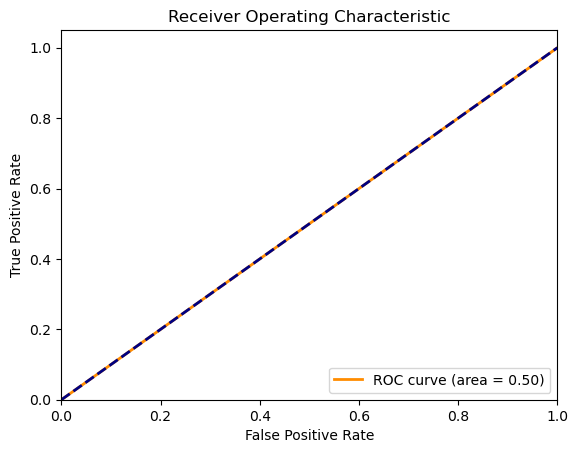

In [193]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# ANN

In [194]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, roc_curve, auc
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [195]:
df10 = pd.read_csv('ML-EdgeIIoT-dataset.csv')
df10

C:\Users\Admin\AppData\Local\Temp\ipykernel_17244\435255071.py:1: DtypeWarning: Columns (3,6,11,13,14,15,16,17,31,32,34,39,45,51,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df10 = pd.read_csv('ML-EdgeIIoT-dataset.csv')


,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
1,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
2,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
3,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
4,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157795,2021 23:24:32.698981000,193.152.82.43,192.168.0.128,0,0.0,0.0,0,48729.0,40690.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
157796,2021 23:24:32.699354000,253.52.1.213,192.168.0.128,0,0.0,0.0,0,45657.0,40702.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
157797,2021 23:24:32.719931000,107.155.221.49,192.168.0.128,0,0.0,0.0,0,57686.0,41423.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
157798,2021 23:24:32.752054000,77.242.58.228,192.168.0.128,0,0.0,0.0,0,9555.0,42379.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP


In [196]:
df10['frame.time'] = pd.to_datetime(df10['frame.time'], errors='coerce')

In [197]:
df10['hour'] = df10['frame.time'].dt.hour
df10['day'] = df10['frame.time'].dt.day
df10['month'] = df10['frame.time'].dt.month
df10['year'] = df10['frame.time'].dt.year

In [198]:
df10.fillna(0, inplace=True)

In [199]:
encoder = LabelEncoder()
df10['Attack_label_encoded'] = encoder.fit_transform(df10['Attack_label'])

In [200]:
X = df10[['hour', 'day', 'month', 'year']]
y = df10['Attack_label_encoded']

In [201]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [203]:
model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [204]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [206]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
3156/3156 [==============================] - 11s 3ms/step - loss: 0.3193 - accuracy: 0.8706 - val_loss: 0.3167 - val_accuracy: 0.8717
Epoch 2/10
3156/3156 [==============================] - 11s 3ms/step - loss: 0.3192 - accuracy: 0.8706 - val_loss: 0.3173 - val_accuracy: 0.8717
Epoch 3/10
3156/3156 [==============================] - 10s 3ms/step - loss: 0.3194 - accuracy: 0.8706 - val_loss: 0.3179 - val_accuracy: 0.8717
Epoch 4/10
3156/3156 [==============================] - 11s 3ms/step - loss: 0.3192 - accuracy: 0.8706 - val_loss: 0.3170 - val_accuracy: 0.8717
Epoch 5/10
3156/3156 [==============================] - 10s 3ms/step - loss: 0.3192 - accuracy: 0.8706 - val_loss: 0.3179 - val_accuracy: 0.8717
Epoch 6/10
3156/3156 [==============================] - 10s 3ms/step - loss: 0.3192 - accuracy: 0.8706 - val_loss: 0.3166 - val_accuracy: 0.8717
Epoch 7/10
3156/3156 [==============================] - 10s 3ms/step - loss: 0.3191 - accuracy: 0.8705 - val_loss: 0.3176 - val_ac

In [207]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)


987/987 [==============================] - 2s 2ms/step


In [208]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

recall = recall_score(y_test, y_pred)
print("Recall:", recall)


precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Confusion Matrix:
[[  805  4180]
 [    0 26575]]
Accuracy: 0.867553865652725
F1-score: 0.9270887842316414
Recall: 1.0
Precision: 0.8640871403023899


In [209]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


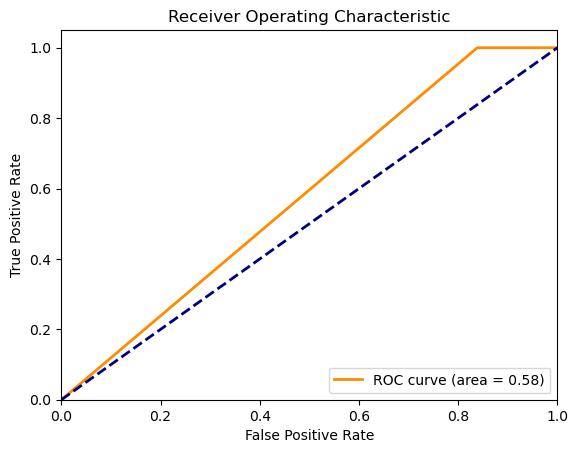

In [214]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()